In [22]:
%matplotlib inline

In [86]:
# IMPORTS
from util import *
from Chapter3 import OutlierDetection, ImputationMissingValues, DataTransformation, KalmanFilters
from util.VisualizeDataset import VisualizeDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import warnings

In [2]:
# CONSTANTS
DATASETS_FOLDER_NAME = 'datasets'
DATASET_NAME = 'csv-participant-one'
DATASETS_FOLDER_PATH = os.path.join('..', DATASETS_FOLDER_NAME)
DATASET_PATH = os.path.join(DATASETS_FOLDER_PATH, DATASET_NAME)

In [89]:
# SETUP
warnings.filterwarnings('ignore')
outlier_detector = OutlierDetection.DistributionBasedOutlierDetection()
imputator = ImputationMissingValues.ImputationMissingValues()
data_transformer = DataTransformation.PrincipalComponentAnalysis()
kalman_filter = KalmanFilters.KalmanFilters()
visualizer = VisualizeDataset()

### Chapter 3 Ex 3

In [19]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'heart_rate_smartwatch.csv'))

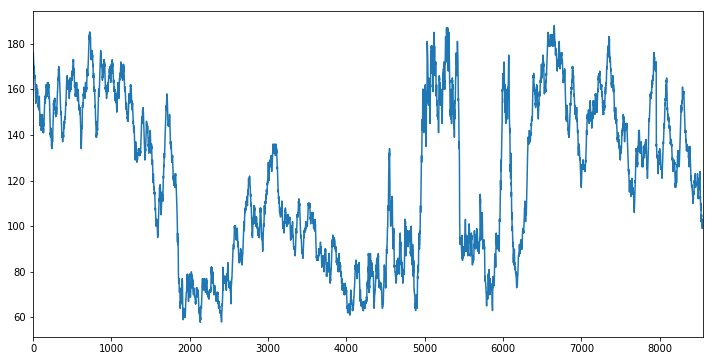

In [49]:
dataset.rate.plot(figsize=(12,6))

In [42]:
print("The amount of missing heart rates is: %d." % dataset.rate.isna().sum())

The amount of missing heart rates is: 0.


There is no missing data, let's look for outliers

In [48]:
dataset = kalman_filter.apply_kalman_filter(dataset, 'rate')

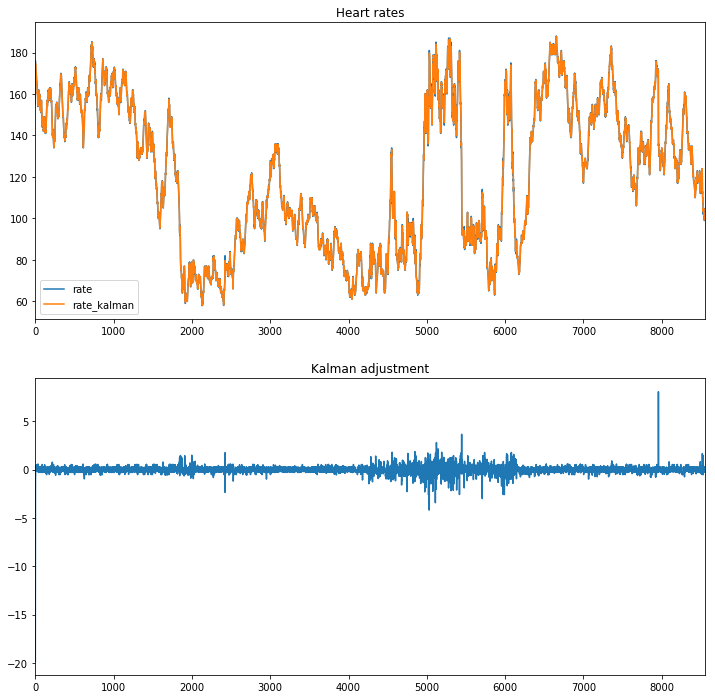

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,12))
dataset.plot(y=['rate', 'rate_kalman'], ax=ax1, title="Heart rates")
(dataset.rate_kalman-dataset.rate).plot(ax=ax2, title="Kalman adjustment")